In [230]:
import networkx as nx
import matplotlib.pyplot as plt
import random as R
import numpy as np
from random import randrange

In [231]:
#Read graph from file
#G = nx.read_edgelist('p2p-Gnutella08.txt', create_using=nx.DiGraph(), nodetype=int)
G = nx.karate_club_graph()

In [232]:
labels = {}
for n in G.nodes():
    labels[n]=['S', 'y']

In [233]:
print(labels)

{0: ['S', 'y'], 1: ['S', 'y'], 2: ['S', 'y'], 3: ['S', 'y'], 4: ['S', 'y'], 5: ['S', 'y'], 6: ['S', 'y'], 7: ['S', 'y'], 8: ['S', 'y'], 9: ['S', 'y'], 10: ['S', 'y'], 11: ['S', 'y'], 12: ['S', 'y'], 13: ['S', 'y'], 14: ['S', 'y'], 15: ['S', 'y'], 16: ['S', 'y'], 17: ['S', 'y'], 18: ['S', 'y'], 19: ['S', 'y'], 20: ['S', 'y'], 21: ['S', 'y'], 22: ['S', 'y'], 23: ['S', 'y'], 24: ['S', 'y'], 25: ['S', 'y'], 26: ['S', 'y'], 27: ['S', 'y'], 28: ['S', 'y'], 29: ['S', 'y'], 30: ['S', 'y'], 31: ['S', 'y'], 32: ['S', 'y'], 33: ['S', 'y']}


In [234]:
pos = nx.spring_layout(G)

In [235]:
def get_colors(l):
    colors = []
    for i in range(len(l)):
        colors.append(l[i][1])
    return colors


In [236]:
p = 1/2
T = 3
q = 1/2
i0 = 3

In [237]:
nodes_inf = []
for i in range(0, i0):
    node = randrange(len(G.nodes())-1)
    labels[node]=['I', 'r', 0]

In [238]:
print(labels)

{0: ['S', 'y'], 1: ['S', 'y'], 2: ['S', 'y'], 3: ['S', 'y'], 4: ['S', 'y'], 5: ['S', 'y'], 6: ['S', 'y'], 7: ['S', 'y'], 8: ['S', 'y'], 9: ['S', 'y'], 10: ['I', 'r', 0], 11: ['S', 'y'], 12: ['S', 'y'], 13: ['S', 'y'], 14: ['I', 'r', 0], 15: ['S', 'y'], 16: ['S', 'y'], 17: ['S', 'y'], 18: ['S', 'y'], 19: ['S', 'y'], 20: ['S', 'y'], 21: ['I', 'r', 0], 22: ['S', 'y'], 23: ['S', 'y'], 24: ['S', 'y'], 25: ['S', 'y'], 26: ['S', 'y'], 27: ['S', 'y'], 28: ['S', 'y'], 29: ['S', 'y'], 30: ['S', 'y'], 31: ['S', 'y'], 32: ['S', 'y'], 33: ['S', 'y']}


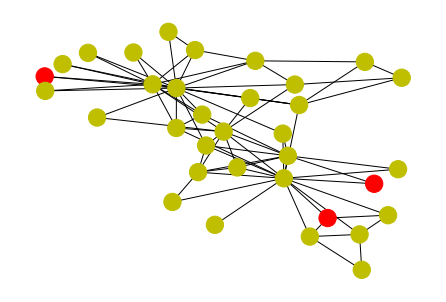

In [239]:
nx.draw(G,pos, node_color=get_colors(labels))

In [240]:
def check_allR(l):
    for i in range(len(l)):
        if(labels[i][0] != 'R'):
            return False
    return True

In [241]:
def from_I_to_R():
    for i in range(len(labels)):
        if labels[i][0] == 'I':
            if labels[i][2] <= T:
                labels[i][2]+=1
            else:
                numb = R.uniform(0,1)
                if numb < q:
                    labels[i] = ['R', 'g', labels[i][2]]
                else:
                    labels[i][2]+=1


In [242]:
def from_S_to_I():
    for i in range(len(labels)):
        if labels[i][0] == 'I':
            neighbors = [n for n in G.neighbors(i)]
            for n in neighbors:
                if labels[n][0] == 'S':
                    numb = R.uniform(0,1)
                    if numb < p:
                        labels[n] = ['I', 'r', 0]

In [243]:
def saveFig(file):
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    nx.draw_networkx_nodes(G,pos, node_color=get_colors(labels))
    nx.draw_networkx_edges(G,pos)
    plt.show()
    #plt.savefig(file, format="PNG")
    #del fig

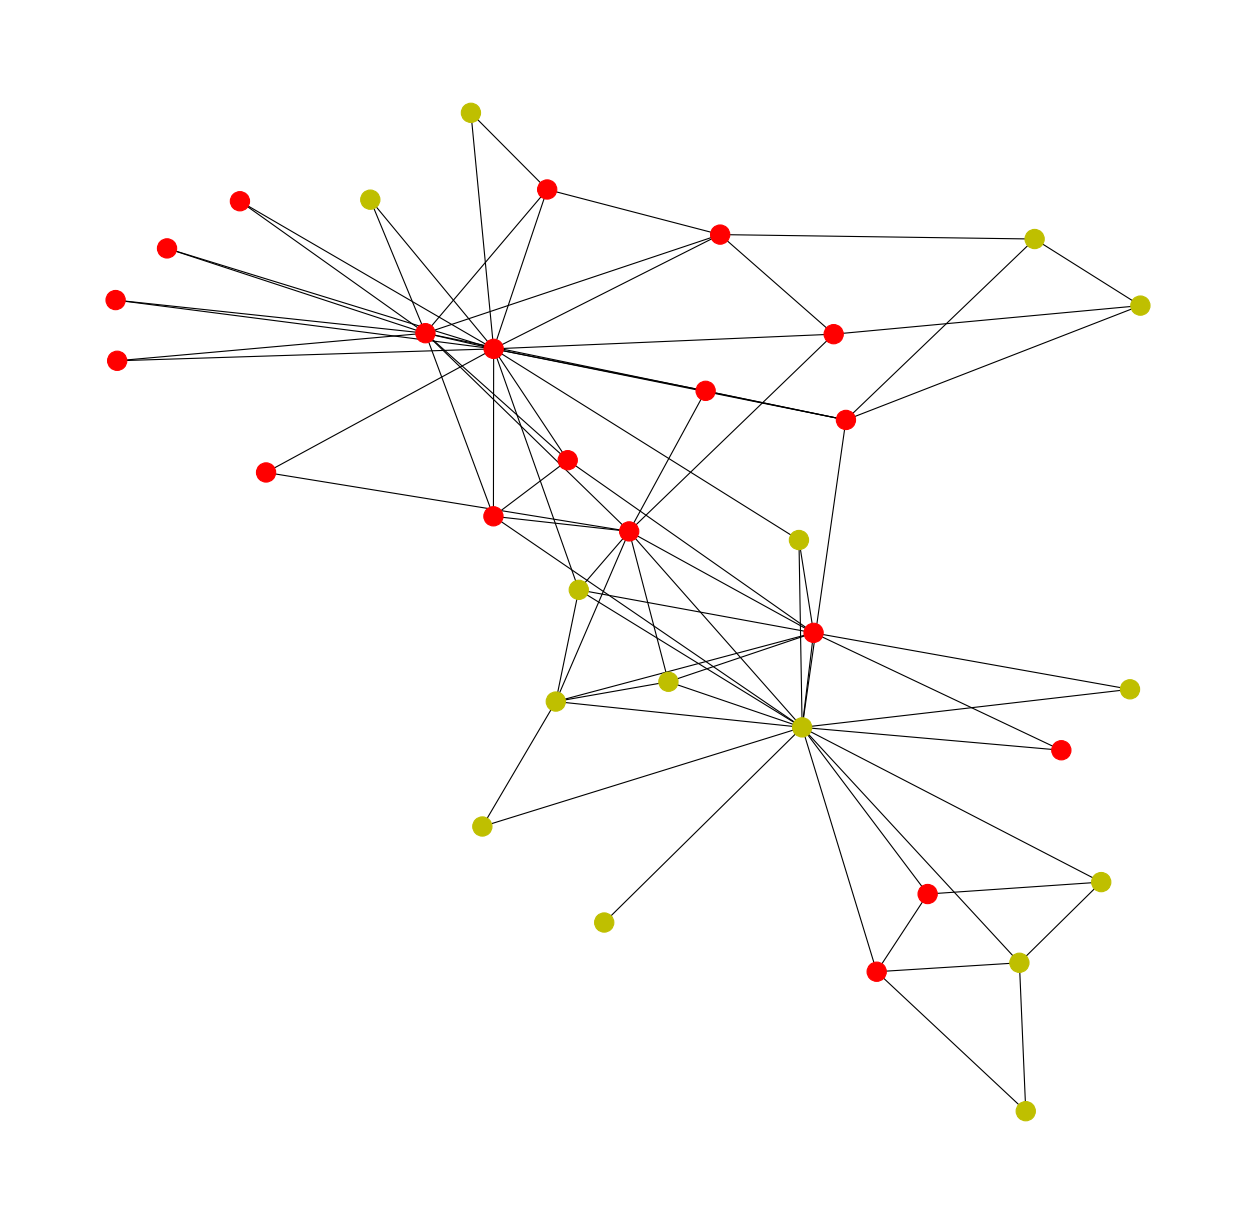

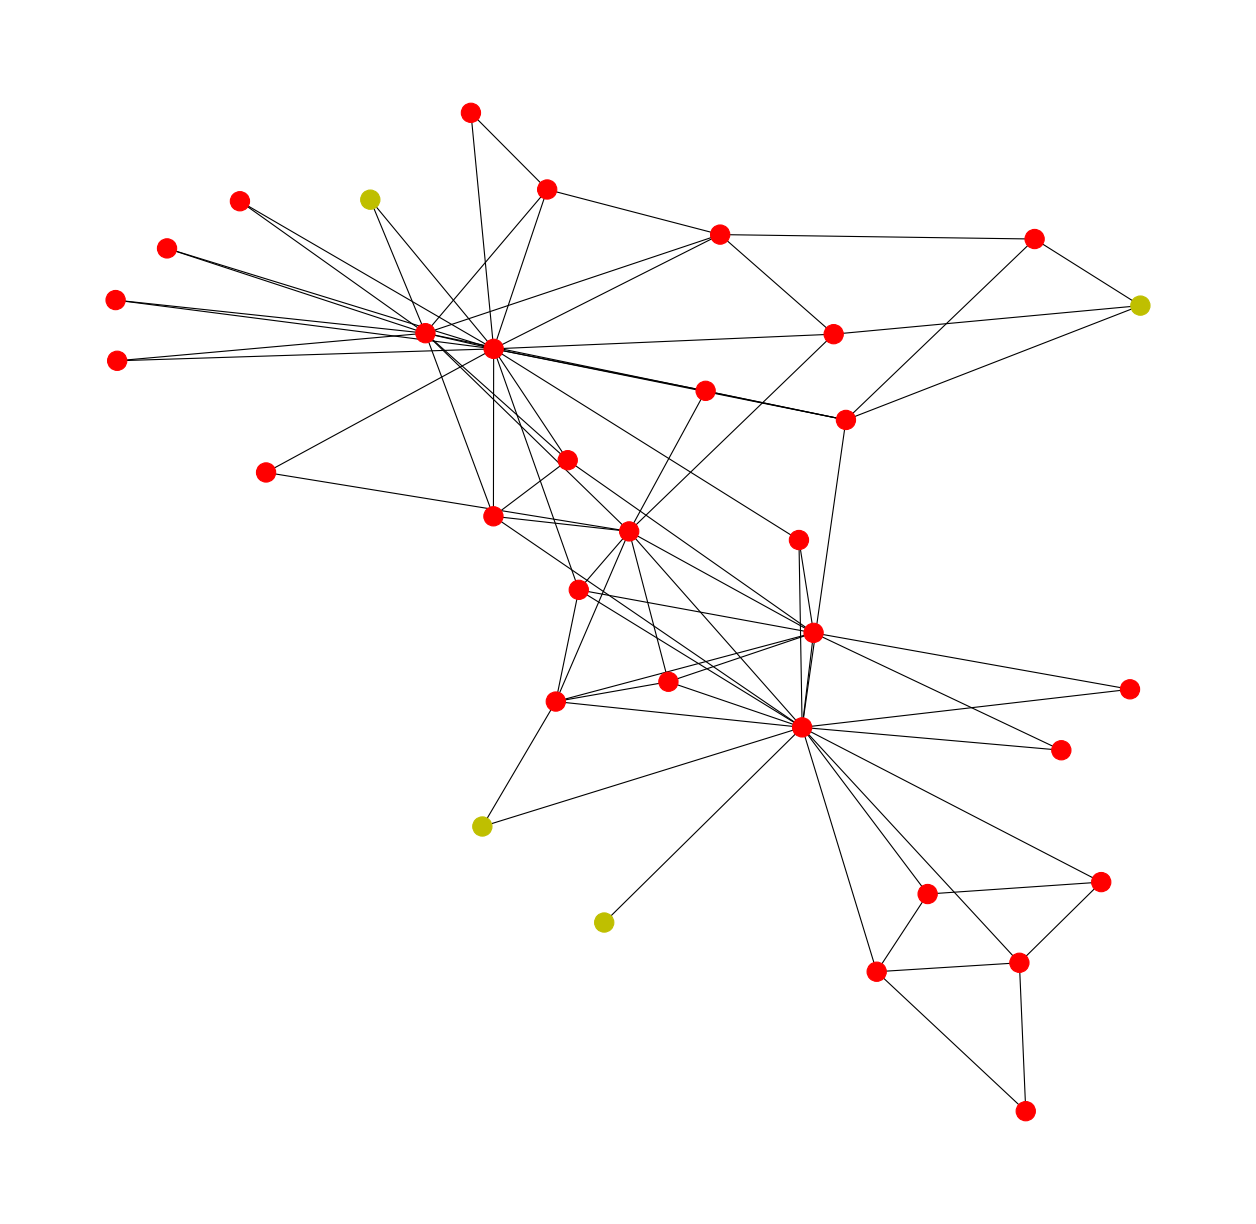

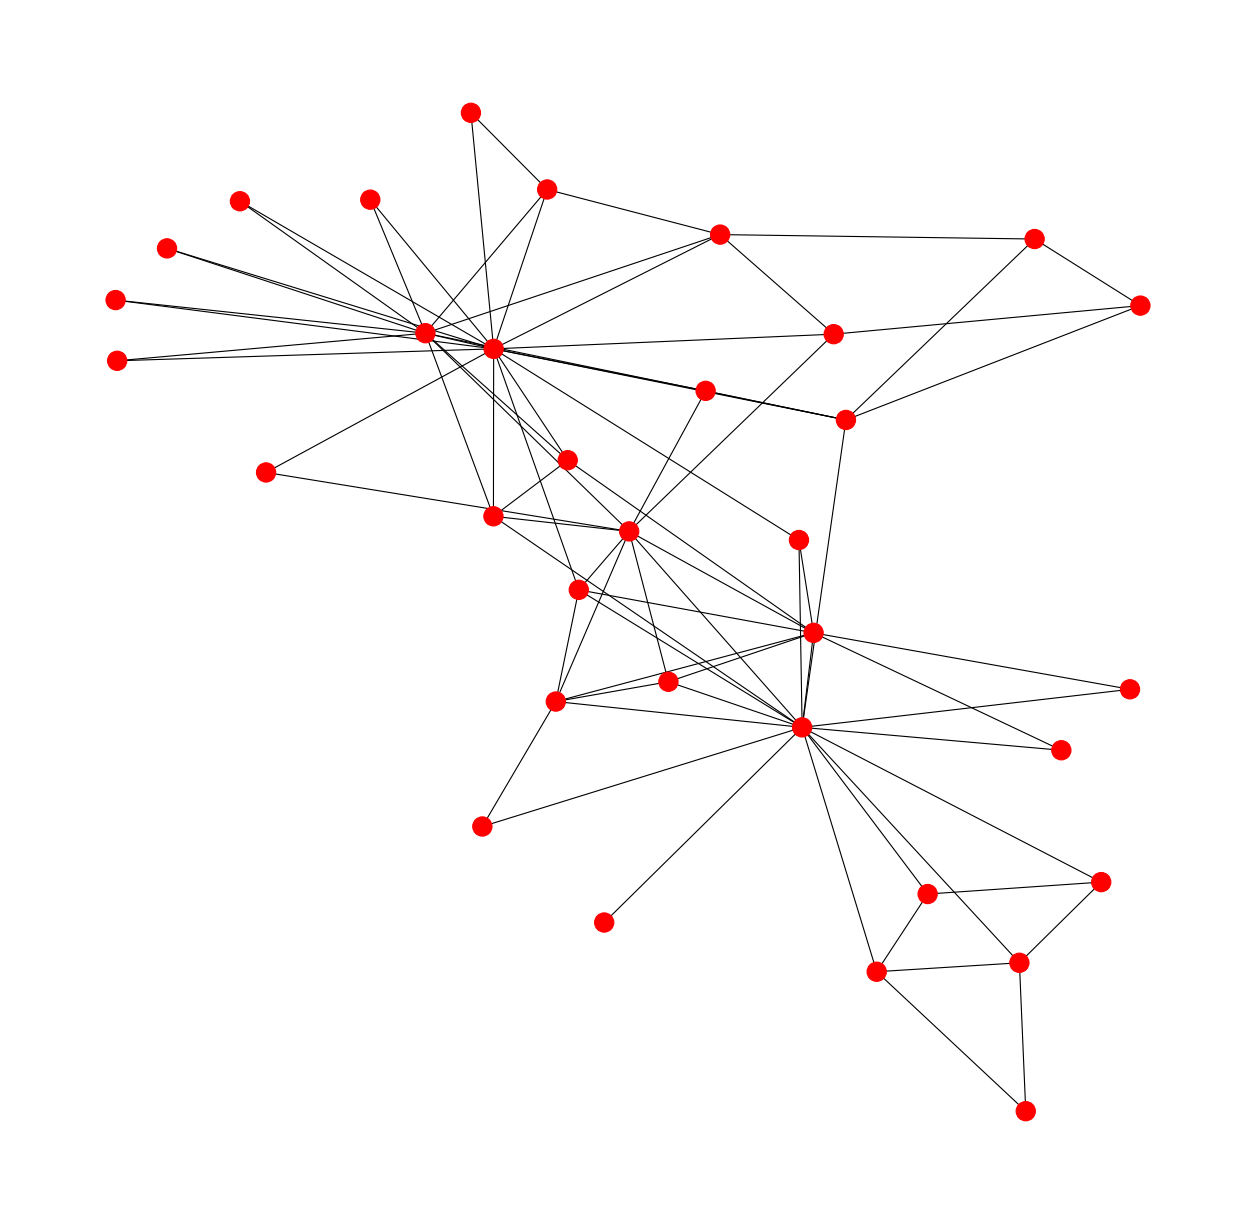

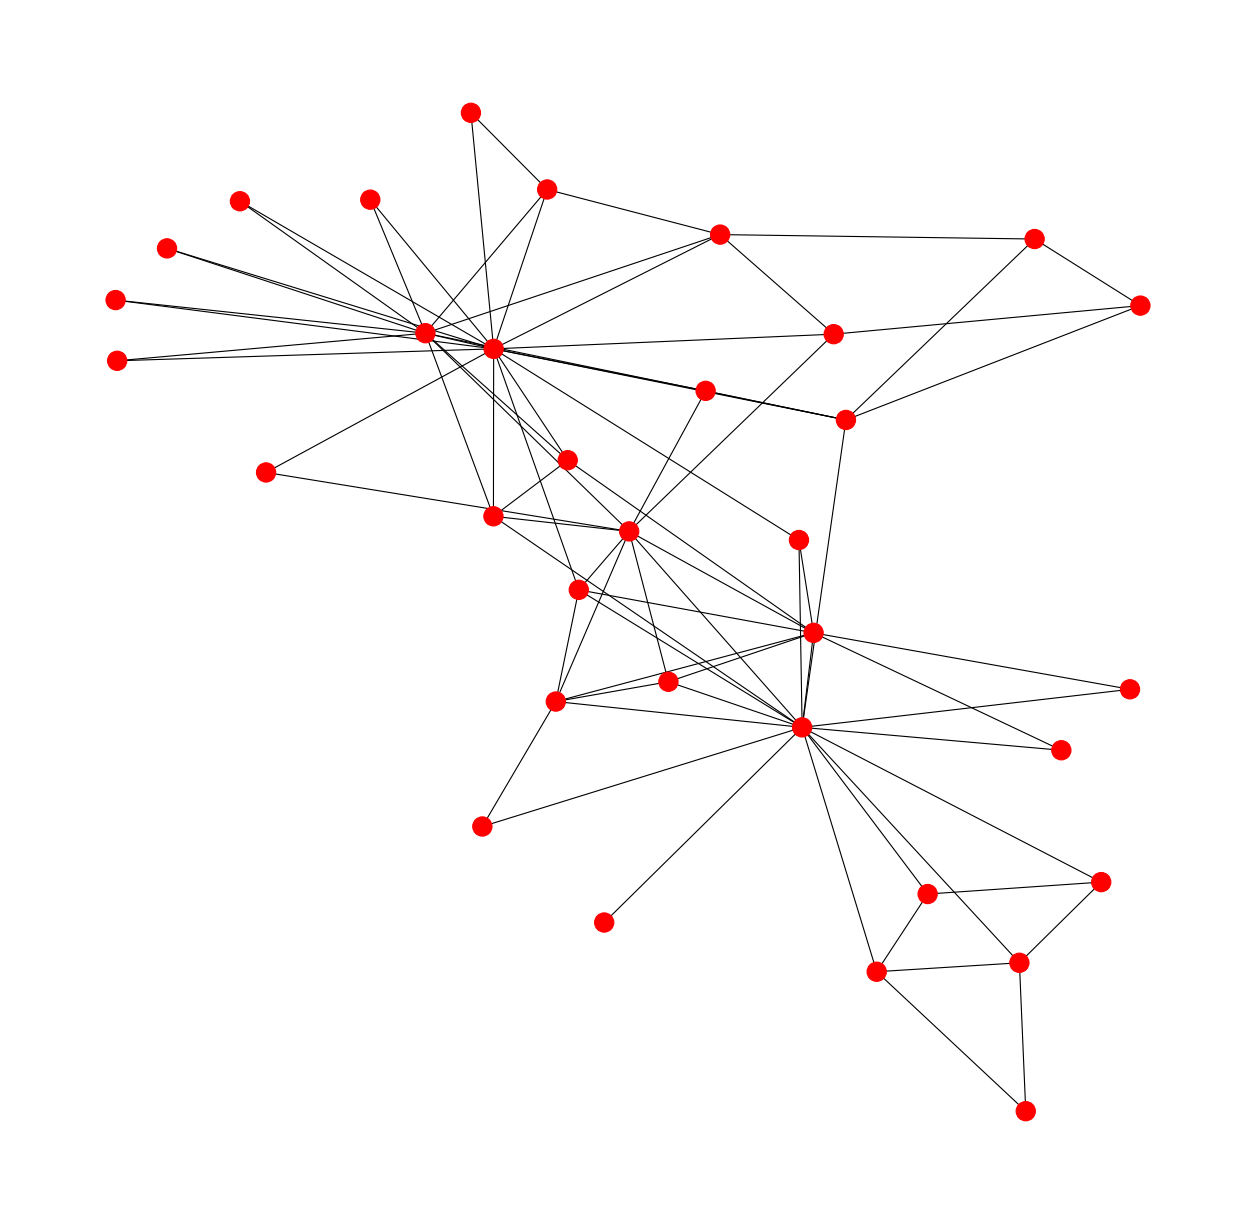

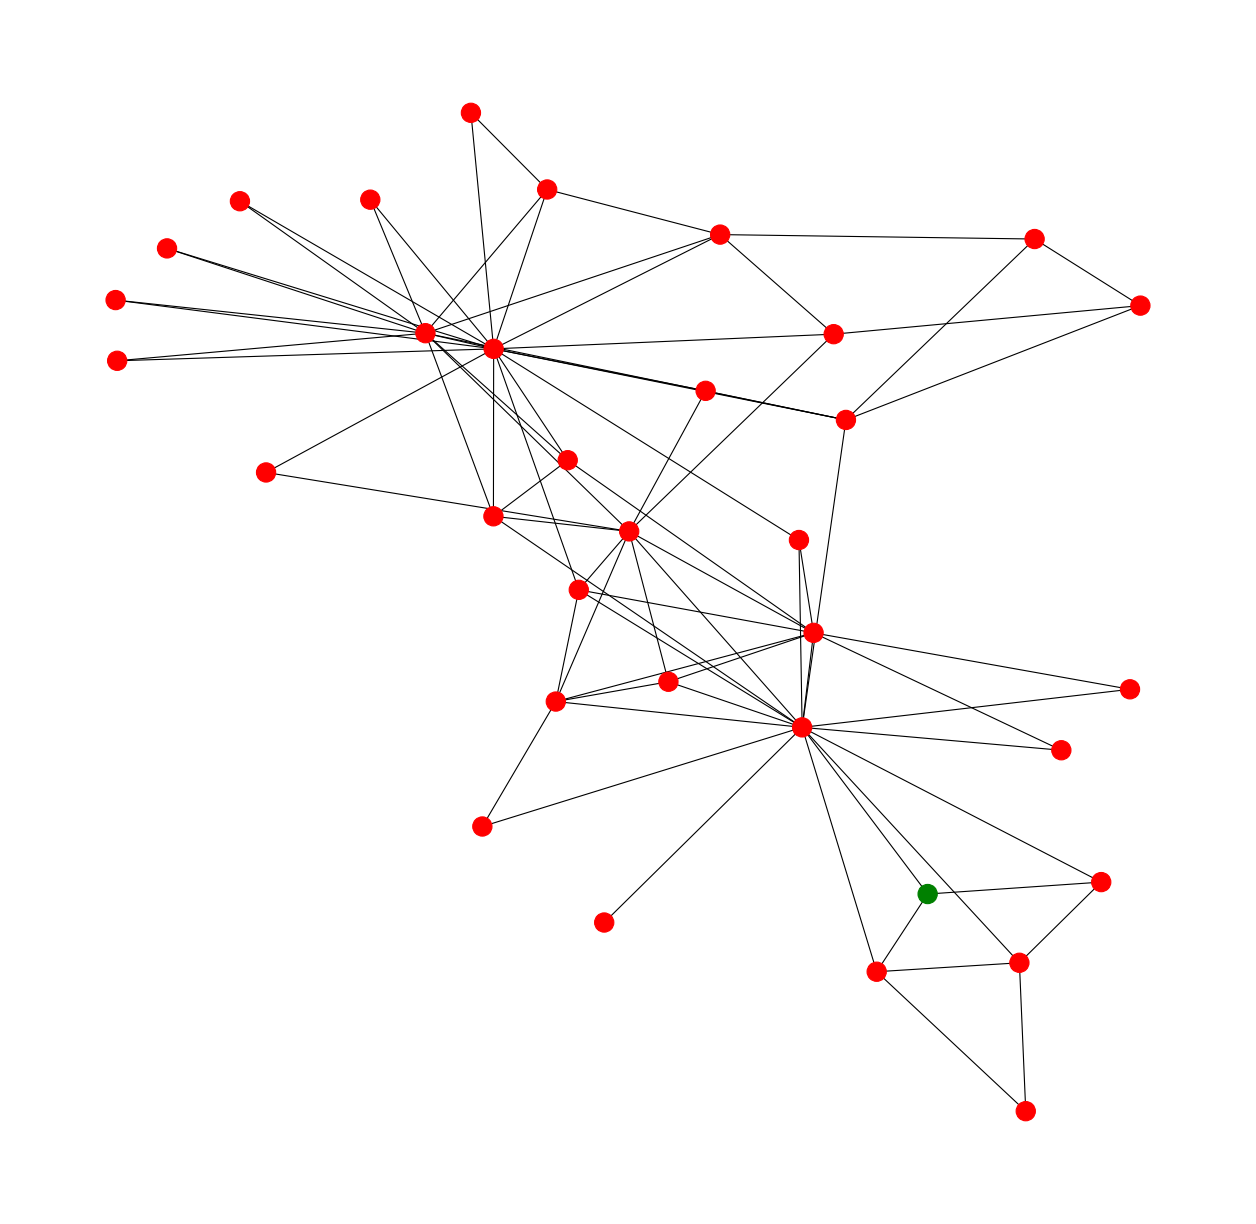

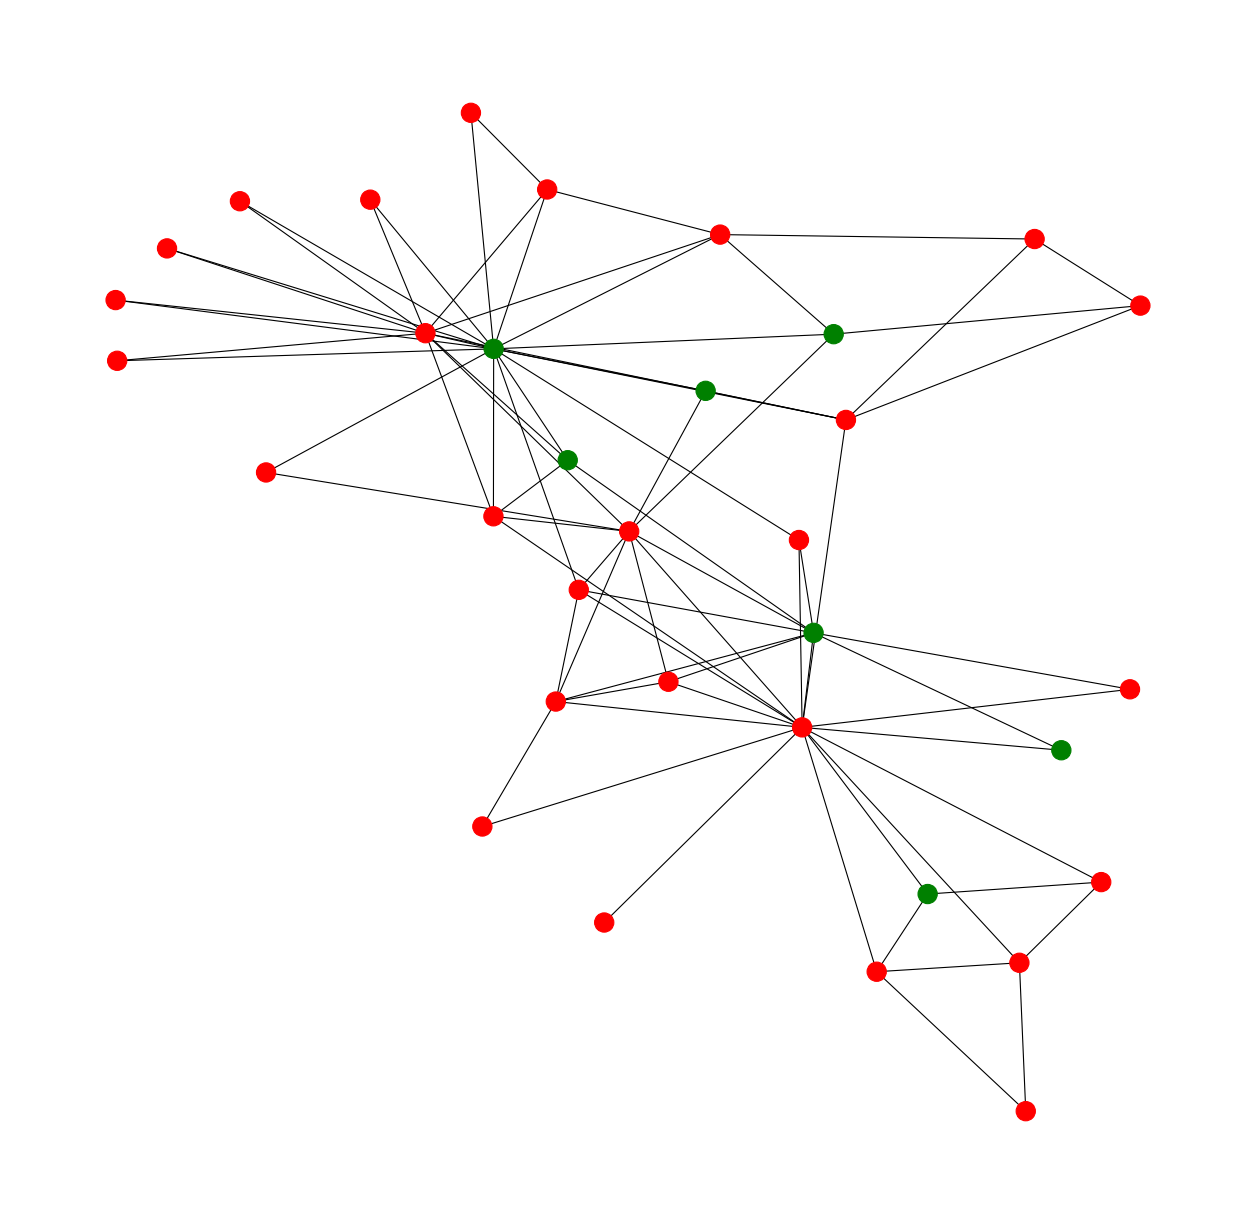

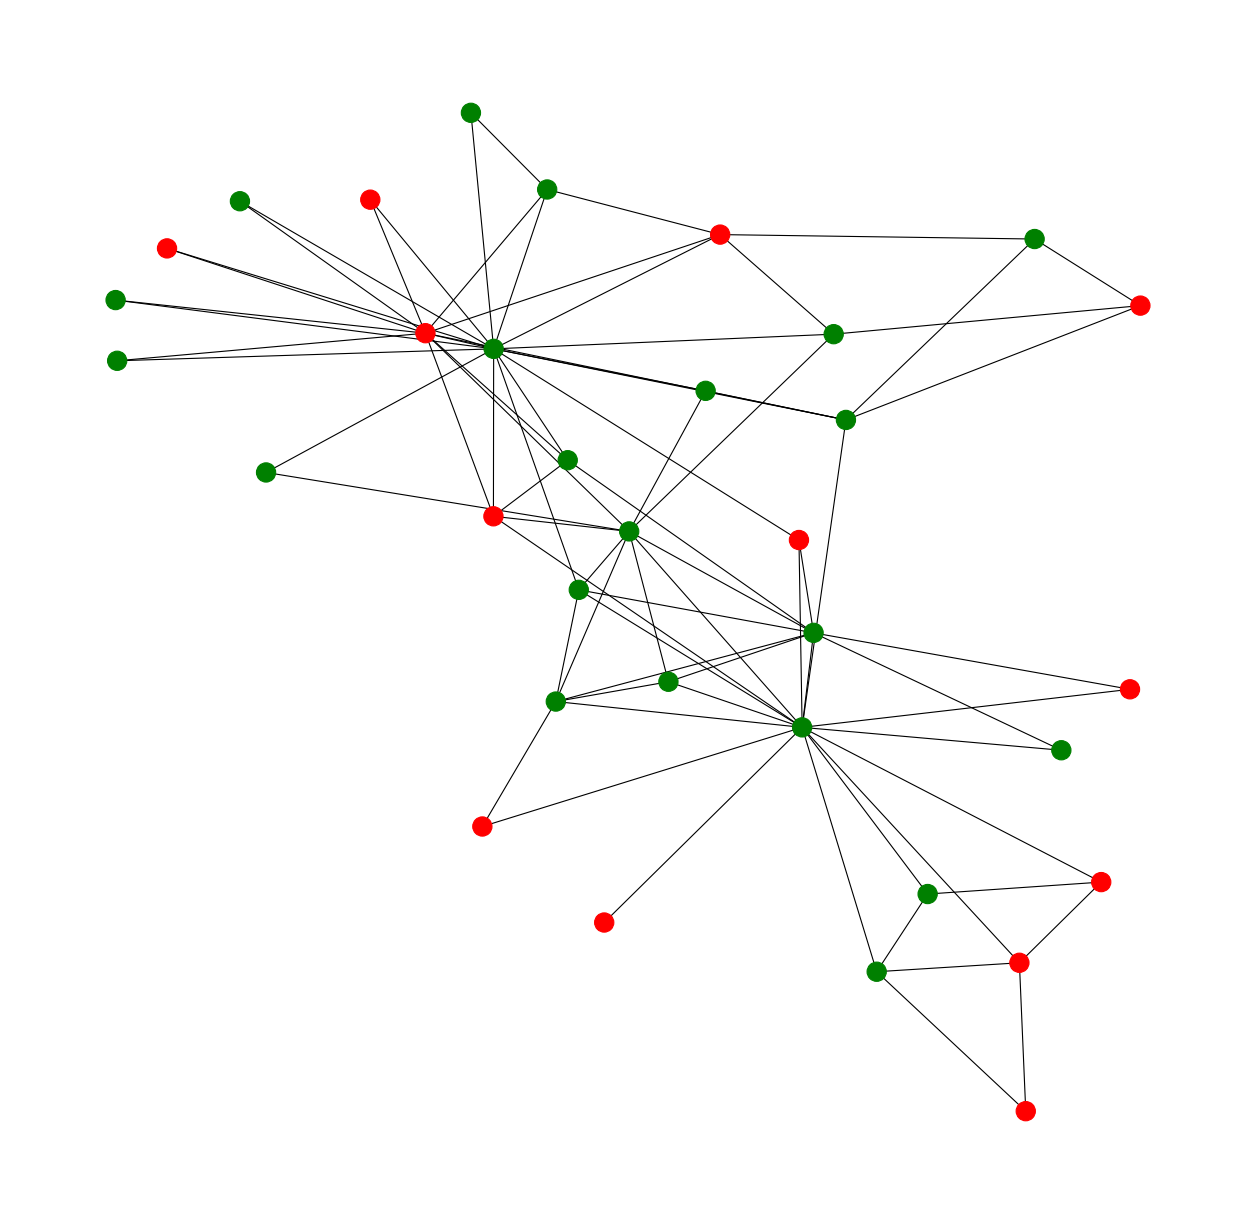

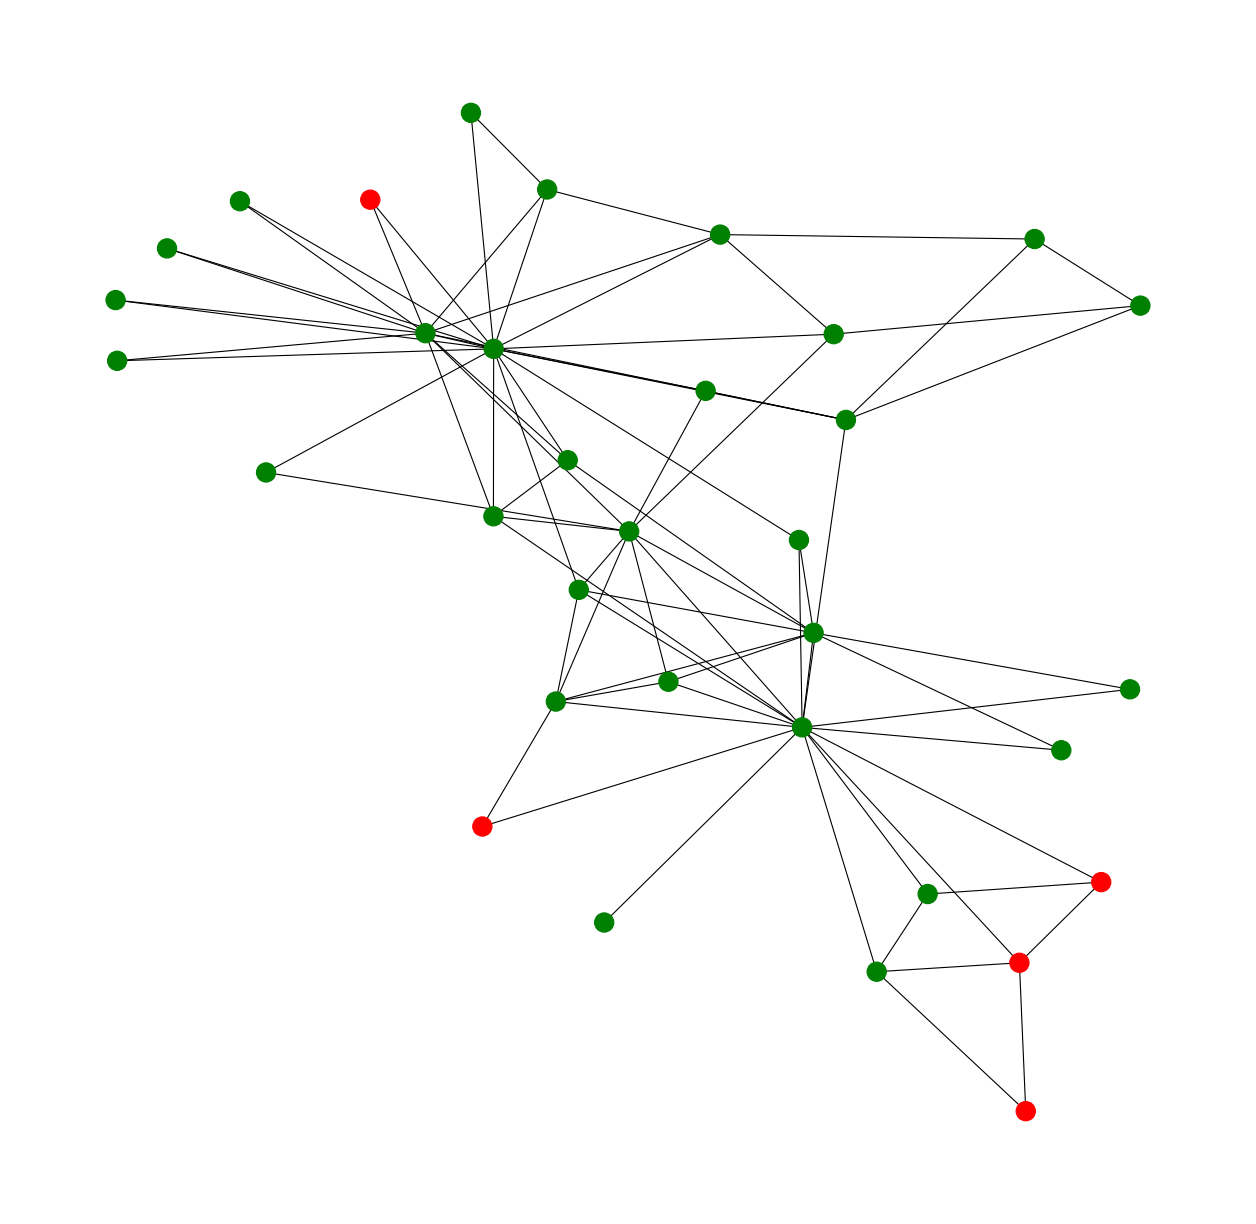

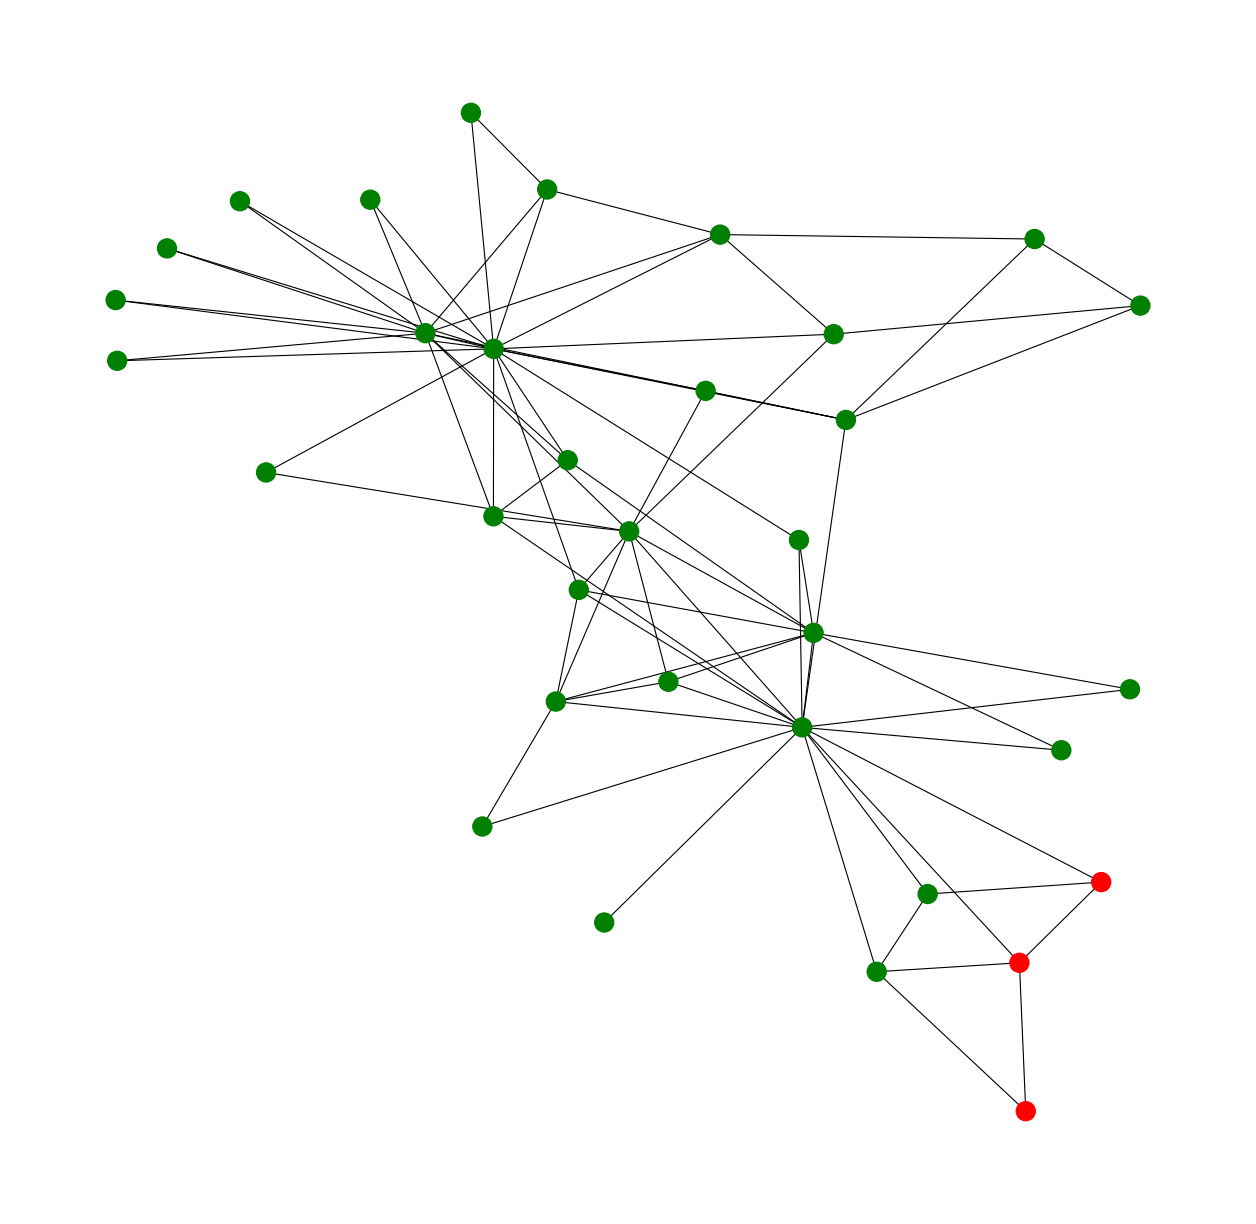

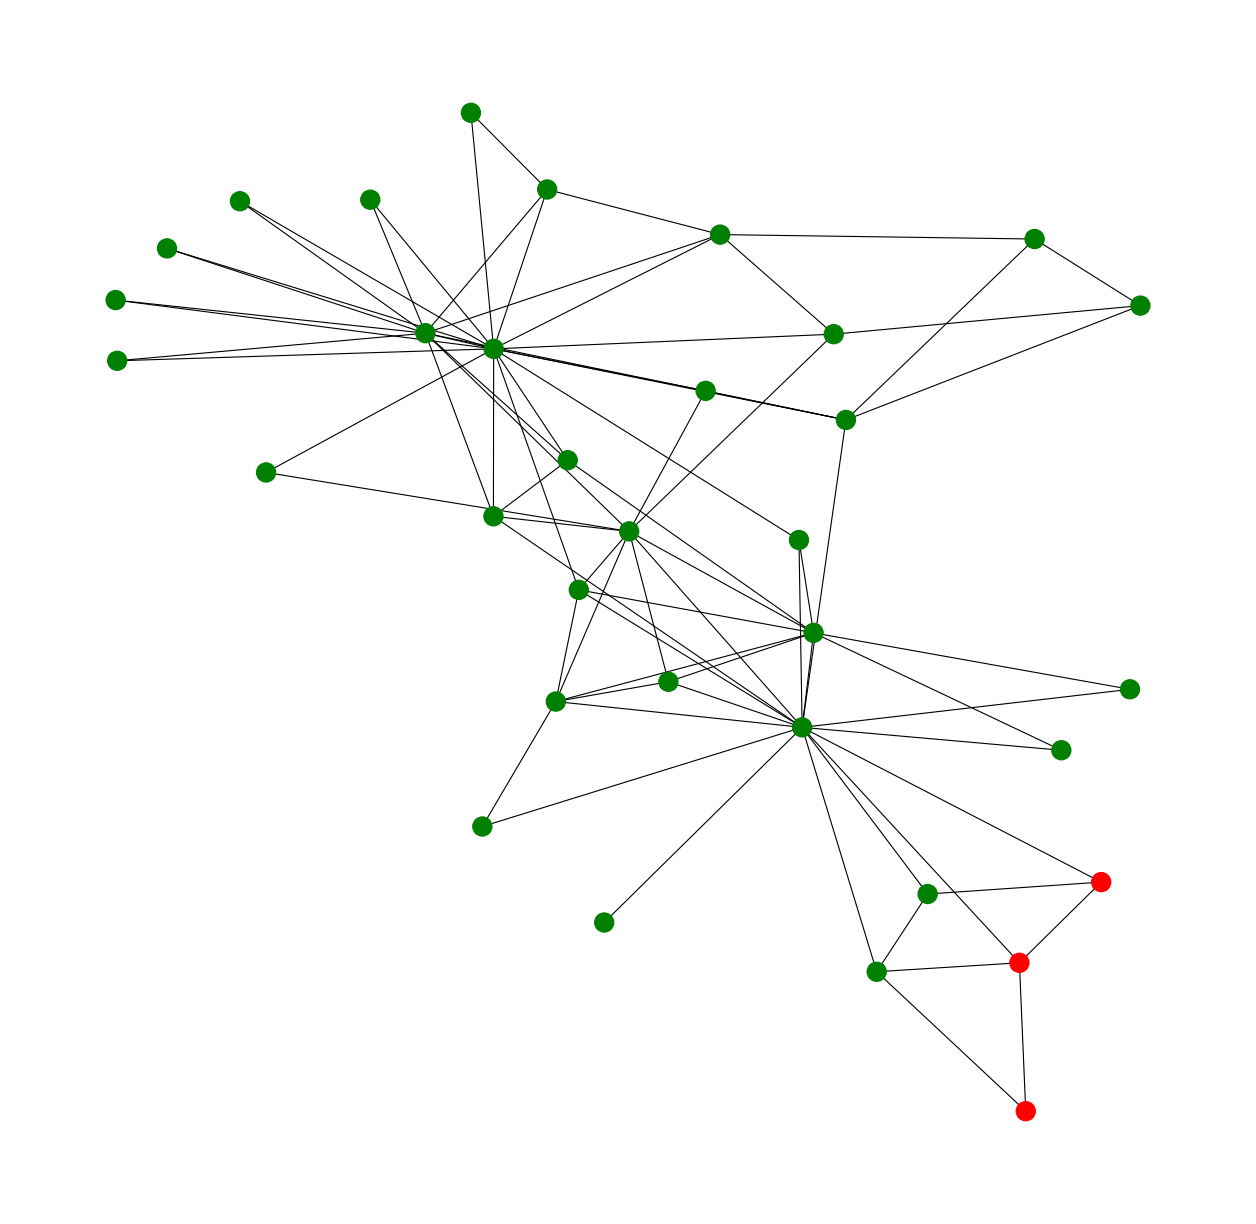

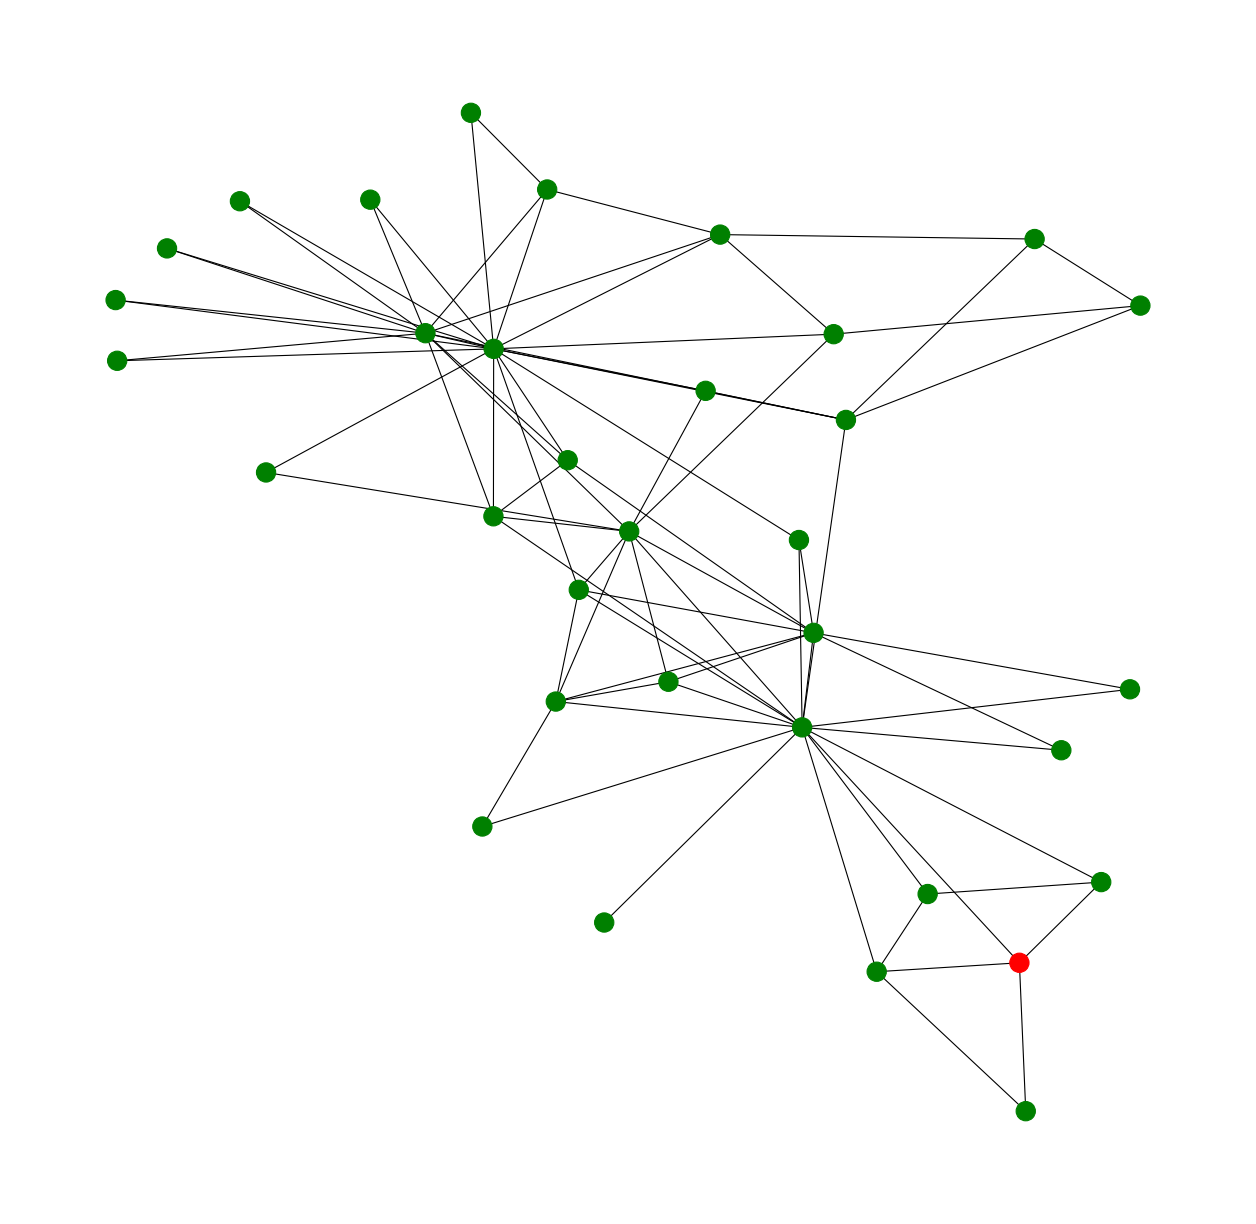

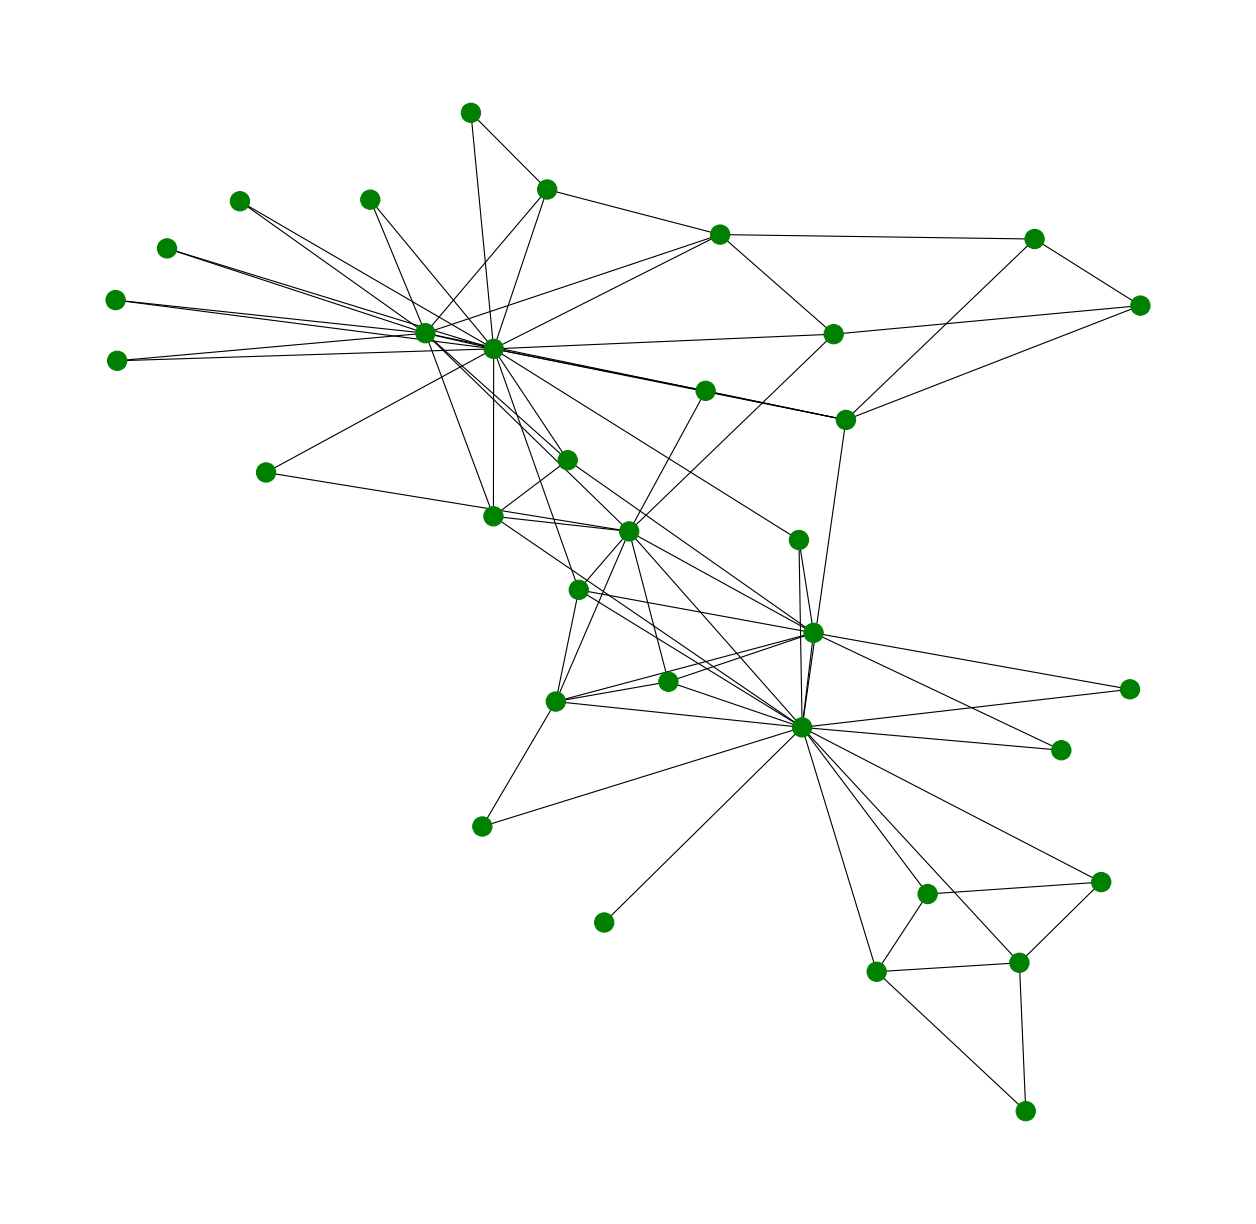

In [244]:
num = 0
while True:
    from_I_to_R()
    from_S_to_I()
    name_file = str(num)+".png"
    saveFig(name_file)
    num+=1
    if check_allR(labels):
        break
    